## MA3K7 Week 9 Rubric Code

In [42]:
import numpy as np
import random
import math
import sympy as sp
from sympy.abc import m
import matplotlib.pyplot as plt

### Simulation of game

In [89]:
hit = 0
miss = 0

for _ in range(100000):
    step = 1
    for i in range(25):
        move = random.randint(1,2)
        step += move

        if step == 25:
            hit += 1
            break
        if step == 26:
            miss += 1
            break

prob = hit / 100000
print(f"Over 100,000 games, the probability of landing on 25 is:", prob)

Over 100,000 games, the probability of landing on 25 is: 0.66644


### Method 1 - recurrence relation

In [38]:
# Solve the roots of the characteristic polynomial
M = sp.solve(m**2 - (1/2)*m - 1/2, m)

print(f"We have the roots: {M[0], M[1]}")

# Solve the linear system
x, y = sp.symbols("x,y")
A = sp.Matrix([[1, 1], [M[0], M[1]]])
b = sp.Matrix([0, 1])
C,= sp.linsolve((A, b), x, y)

print(f"We have the constants C_1 = {C[0]} and C_2 = {C[1]}")

We have the roots: (-0.500000000000000, 1.00000000000000)
We have the constants C_1 = -0.666666666666667 and C_2 = 0.666666666666667


In [66]:
def prob1(N):
    return 2/3 * (1 - (-1/2)**N)

prob1(25)

0.6666666865348816

### Method 2 - summation from counting 1's and 2's

In [67]:
def prob2(N):
    sum = 0
    M = int(N/2-1)
    L= int((1/2)*(N-1))
    
    if N % 2 == 0:
        for k in range(M+1):
            sum += math.comb(N-1-k,k) * math.pow(1/2,N-1-k)
    
    else:
        for k in range(L+1):
            sum += math.comb(N-1-k,k) * math.pow(1/2,N-1-k)
            
    return sum

prob2(25)

0.6666666865348816

### Extension - plotting probabilities for larger N

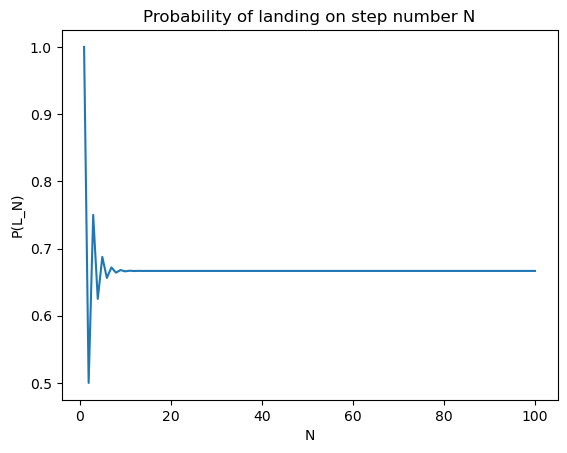

The probability of landing on S_100 is: 0.6666666666666666


In [68]:
def plot(N):
    x = np.arange(1,N+1)
    
    plt.plot(x, prob1(x))
    plt.xlabel('N')
    plt.ylabel('P(L_N)')
    plt.title('Probability of landing on step number N')
    plt.show()
    
    print(f"The probability of landing on S_{N} is:", prob1(N))
    
plot(100)